# Análisis de encuestas
## 1. Importación de librerías y establecimiento de directorio de trabajo

In [1]:
import os
import pandas as pd
import math

import seaborn as sns  
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D  
%matplotlib inline  

os.chdir("C:/Users/aleja/OneDrive - Universidad Politécnica de Madrid/Universidad/Asignaturas/Cuarto/Trabajo de Fin de Grado/")

# 2. Carga de datos

In [2]:
encuesta = pd.read_csv("Encuestas/Indicadores de calidad de vida.csv")
encuesta.head()

,Marca temporal,¡Cuál es su edad?,0 - 17 años,18 - 64 años,65+ años,0 - 17 años.1,18 - 64 años.1,65+ años.1,0 - 17 años.2,18 - 64 años.2,...,65+ años.8,0 - 17 años.9,18 - 64 años.9,65+ años.9,0 - 17 años.10,18 - 64 años.10,65+ años.10,0 - 17 años.11,18 - 64 años.11,65+ años.11
0,2022/05/11 6:28:31 p. m. EET,NaN,4.0,4,4.0,2.0,3,4.0,4.0,3,...,1.0,3.0,4,2.0,1.0,4,4.0,0.0,2,2.0
1,2022/05/11 6:40:55 p. m. EET,22,2.0,3,3.0,2.0,3,2.0,4.0,4,...,3.0,4.0,4,4.0,4.0,4,4.0,3.0,3,3.0
2,2022/05/11 7:01:25 p. m. EET,55,1.0,0,2.0,4.0,2,3.0,4.0,2,...,4.0,3.0,4,4.0,1.0,4,4.0,0.0,3,4.0
3,2022/05/11 7:52:06 p. m. EET,53,4.0,3,4.0,3.0,3,3.0,4.0,2,...,4.0,3.0,4,4.0,3.0,4,4.0,2.0,3,4.0
4,2022/05/11 9:37:56 p. m. EET,58,4.0,4,4.0,2.0,4,2.0,4.0,3,...,2.0,3.0,3,1.0,1.0,4,4.0,0.0,2,1.0


# 3. Análisis por grupos de edad
## 3.1. Menores de 18 años

In [4]:
encuesta_menores = encuesta.copy()
encuesta_menores = encuesta_menores.drop(columns=['18 - 64 años', '18 - 64 años.1', '18 - 64 años.2', '18 - 64 años.3', 
                                                  '18 - 64 años.4', '18 - 64 años.5', '18 - 64 años.6', '18 - 64 años.7', 
                                                  '18 - 64 años.8', '18 - 64 años.9', '18 - 64 años.10', '18 - 64 años.11', 
                                                  '65+ años', '65+ años.1', '65+ años.2', '65+ años.3', '65+ años.4', 
                                                  '65+ años.5', '65+ años.6', '65+ años.7', '65+ años.8', '65+ años.9', 
                                                  '65+ años.10', '65+ años.11', "Marca temporal"])

encuesta_menores = encuesta_menores.dropna(axis=0, how="any")
encuesta_menores.reset_index(drop=True, inplace=True)

encuesta_menores.head()

,¡Cuál es su edad?,0 - 17 años,0 - 17 años.1,0 - 17 años.2,0 - 17 años.3,0 - 17 años.4,0 - 17 años.5,0 - 17 años.6,0 - 17 años.7,0 - 17 años.8,0 - 17 años.9,0 - 17 años.10,0 - 17 años.11
0,22,2.0,2.0,4.0,2.0,4.0,0.0,4.0,1.0,3.0,4.0,4.0,3.0
1,55,1.0,4.0,4.0,0.0,1.0,0.0,4.0,2.0,4.0,3.0,1.0,0.0
2,53,4.0,3.0,4.0,4.0,4.0,0.0,4.0,3.0,3.0,3.0,3.0,2.0
3,58,4.0,2.0,4.0,1.0,4.0,0.0,4.0,1.0,4.0,3.0,1.0,0.0
4,19,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,4.0,4.0,4.0,2.0


## 3.2. Mayores de 18 años y menores de 65 años

In [5]:
encuesta_medianos = encuesta.copy()
encuesta_medianos = encuesta_medianos.drop(columns=['0 - 17 años', '0 - 17 años.1', '0 - 17 años.2', '0 - 17 años.3', 
                                                    '0 - 17 años.4', '0 - 17 años.5', '0 - 17 años.6', '0 - 17 años.7', 
                                                    '0 - 17 años.8', '0 - 17 años.9', '0 - 17 años.10', '0 - 17 años.11', 
                                                    '65+ años', '65+ años.1', '65+ años.2', '65+ años.3', '65+ años.4', 
                                                    '65+ años.5', '65+ años.6', '65+ años.7', '65+ años.8', '65+ años.9', 
                                                    '65+ años.10', '65+ años.11', "Marca temporal"])

encuesta_medianos = encuesta_medianos.dropna(axis=0, how="any")
encuesta_medianos.reset_index(drop=True, inplace=True)

encuesta_medianos.head()

,¡Cuál es su edad?,18 - 64 años,18 - 64 años.1,18 - 64 años.2,18 - 64 años.3,18 - 64 años.4,18 - 64 años.5,18 - 64 años.6,18 - 64 años.7,18 - 64 años.8,18 - 64 años.9,18 - 64 años.10,18 - 64 años.11
0,22,3,3,4,4,4,1,3.0,2,4,4,4,3
1,55,0,2,2,3,4,3,3.0,3,4,4,4,3
2,53,3,3,2,4,4,2,4.0,3,4,4,4,3
3,58,4,4,3,2,4,2,3.0,2,4,3,4,2
4,19,4,4,4,4,4,4,4.0,4,4,4,4,4


## 3.3. Mayores de 65 años

In [5]:
encuesta_mayores = encuesta.copy()
encuesta_mayores = encuesta_mayores.drop(columns=['0 - 17 años', '0 - 17 años.1', '0 - 17 años.2', '0 - 17 años.3', 
                                                  '0 - 17 años.4', '0 - 17 años.5', '0 - 17 años.6', '0 - 17 años.7', 
                                                  '0 - 17 años.8', '0 - 17 años.9', '0 - 17 años.10', '0 - 17 años.11', 
                                                  '18 - 64 años', '18 - 64 años.1', '18 - 64 años.2', '18 - 64 años.3', 
                                                  '18 - 64 años.4', '18 - 64 años.5', '18 - 64 años.6', '18 - 64 años.7', 
                                                  '18 - 64 años.8', '18 - 64 años.9', '18 - 64 años.10', '18 - 64 años.11', 
                                                  "Marca temporal"])

encuesta_mayores = encuesta_mayores.dropna(axis=0, how="any")
encuesta_mayores.reset_index(drop=True, inplace=True)

encuesta_mayores.head()

,¡Cuál es su edad?,65+ años,65+ años.1,65+ años.2,65+ años.3,65+ años.4,65+ años.5,65+ años.6,65+ años.7,65+ años.8,65+ años.9,65+ años.10,65+ años.11
0,22,3.0,2.0,1.0,4.0,4.0,3.0,1.0,2.0,3.0,4.0,4.0,3.0
1,55,2.0,3.0,0.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0
2,53,4.0,3.0,0.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0
3,58,4.0,2.0,1.0,4.0,4.0,4.0,1.0,2.0,2.0,1.0,4.0,1.0
4,19,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


## 3.4. Guardar resultados en excel

In [6]:
encuesta_menores.to_excel("Encuestas/Encuesta Menores.xlsx")
encuesta_medianos.to_excel("Encuestas/Encuesta Medianos.xlsx")
encuesta_mayores.to_excel("Encuestas/Encuesta Mayores.xlsx")

Con estos tres archivos, se verán en excel y se creará un único excel que contenga el promedio de los tres rangos
# 4. Cáluclo de pesos
## 4.1. Carga de datos

In [3]:
encuesta = pd.read_excel("Encuestas/Encuesta Resultados.xlsx")
encuesta

,Rango,Edad,Area de recreo,Espacio cultural,Centros educativos,Farmacias,Centros sanitarios,Residencias,Centros deportivos,Servicios públicos,Lugares de ocio,Estaciones transporte,Comercios básicos,Comercios secundarios
0,0-17,31.161290,2.935484,2.290323,3.354839,2.161290,2.645161,0.677419,3.258065,1.387097,2.677419,2.741935,2.096774,1.161290
1,18-64,33.868421,2.763158,2.842105,2.763158,3.236842,3.236842,1.842105,3.052632,2.763158,3.500000,3.447368,3.684211,2.289474
2,65+,32.031250,2.968750,2.593750,1.281250,3.593750,3.687500,3.531250,1.625000,2.781250,2.500000,3.437500,3.625000,2.531250


## 4.2. Cálculo de pesos

In [4]:
encuesta = encuesta.drop(columns=['Rango', 'Edad'])
encuesta["Total"] = 0

for rango in encuesta.index:
    for indicador in encuesta:
        if indicador != "Total":
            encuesta["Total"][rango] = encuesta["Total"][rango] + encuesta[indicador][rango]
        else: 
            continue
    for indicador in encuesta:
        if indicador != "Total":
            encuesta[indicador][rango] = encuesta[indicador][rango] * 100 / encuesta["Total"][rango]
        else:
            continue
encuesta = encuesta.drop(columns=['Total'])
encuesta = encuesta.rename(columns={"Area de recreo": "areas_descanso", "Espacio cultural": "lugares_ocio", 
                                    "Centros educativos": "centros_educativos", "Farmacias": "farmacias", 
                                    "Centros sanitarios": "centros_sanitarios", "Residencias": "residencias", 
                                    "Centros deportivos": "centros_deportivos", "Servicios públicos": "servicios_publicos", 
                                    "Lugares de ocio": "lugares_ocio", "Estaciones transporte": "estaciones_mobilidad", 
                                    "Comercios básicos": "comercios_basicos", 
                                    "Comercios secundarios": "comercios_secundarios"})
encuesta

C:\Users\aleja\AppData\Local\Temp\ipykernel_13592\1983007509.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encuesta["Total"][rango] = encuesta["Total"][rango] + encuesta[indicador][rango]


,areas_descanso,lugares_ocio,centros_educativos,farmacias,centros_sanitarios,residencias,centros_deportivos,servicios_publicos,lugares_ocio,estaciones_mobilidad,comercios_basicos,comercios_secundarios
0,10.718492,8.362780,12.249706,7.891637,9.658422,2.473498,11.896349,5.064782,9.776207,10.011779,7.656066,4.240283
1,7.800892,8.023774,7.800892,9.138187,9.138187,5.200594,8.618128,7.800892,9.881129,9.732541,10.401189,6.463596
2,8.691674,7.593779,3.751144,10.521500,10.795974,10.338518,4.757548,8.142726,7.319305,10.064044,10.612992,7.410796


## 4.3. Guardar datos
### 4.3.1. Excel

In [9]:
encuesta.to_csv("Encuestas/Encuesta.csv")

### 4.3.2. CSV

In [5]:
encuesta.to_excel("Encuestas/Encuesta_pesos.xlsx")

# 5. Plots
## 5.1. Edad de la muestra

In [3]:
# cargar datos
encuesta = pd.read_csv("Encuestas/Indicadores de calidad de vida.csv")

# limpiar datos
encuesta = encuesta.rename(columns={'¡Cuál es su edad?': 'Edad'})
encuesta_edad = encuesta.drop(columns=['0 - 17 años', '0 - 17 años.1', '0 - 17 años.2', '0 - 17 años.3', 
                                                  '0 - 17 años.4', '0 - 17 años.5', '0 - 17 años.6', '0 - 17 años.7', 
                                                  '0 - 17 años.8', '0 - 17 años.9', '0 - 17 años.10', '0 - 17 años.11', 
                                                  '18 - 64 años', '18 - 64 años.1', '18 - 64 años.2', '18 - 64 años.3', 
                                                  '18 - 64 años.4', '18 - 64 años.5', '18 - 64 años.6', '18 - 64 años.7', 
                                                  '18 - 64 años.8', '18 - 64 años.9', '18 - 64 años.10', '18 - 64 años.11', 
                                        '65+ años', '65+ años.1', '65+ años.2', '65+ años.3', '65+ años.4', 
                                                    '65+ años.5', '65+ años.6', '65+ años.7', '65+ años.8', '65+ años.9', 
                                                    '65+ años.10', '65+ años.11',
                                                  "Marca temporal"])
encuesta_edad = encuesta_edad.dropna()
encuesta_edad["Edad"][34] = int(59)
encuesta_edad["Edad"] = encuesta_edad["Edad"].astype(int)
edades = encuesta_edad.drop_duplicates(subset ="Edad")
edades = edades.reset_index()

In [24]:
# contador para saber cuantas personas han votado por edad
edades["Count"] = 0
for i in edades.index:
    for edad2 in encuesta_edad.Edad:
        if edades["Edad"][i] == edad2:
            edades["Count"][i] += 1
            
# porcentaje de personas que han votado por edad
edades["Porcentaje"] = 0
for i in edades.index:
    edades["Porcentaje"][i] = edades["Count"][i] / sum(edades.Count) * 100

C:\Users\aleja\AppData\Local\Temp\ipykernel_11908\4172128380.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edades["Count"][i] += 1
C:\Users\aleja\AppData\Local\Temp\ipykernel_11908\4172128380.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edades["Porcentaje"][i] = edades["Count"][i] / sum(edades.Count) * 100


In [25]:
# se suma las edades para saber el número de votos válidos
sum(edades.Count)

39

In [26]:
# se muestran algunos valores para ver que está bien la tabla
edades.head()

,index,Edad,Count,Porcentaje
0,1,22,7,17.948718
1,2,55,1,2.564103
2,3,53,2,5.128205
3,4,58,1,2.564103
4,5,19,1,2.564103


In [27]:
edades_menor = edades[edades["Edad"] < 18]
edades_menor

,index,Edad,Count,Porcentaje
14,24,16,1,2.564103


In [28]:
edades_mayor = edades[edades["Edad"] > 64]
edades_mayor

,index,Edad,Count,Porcentaje


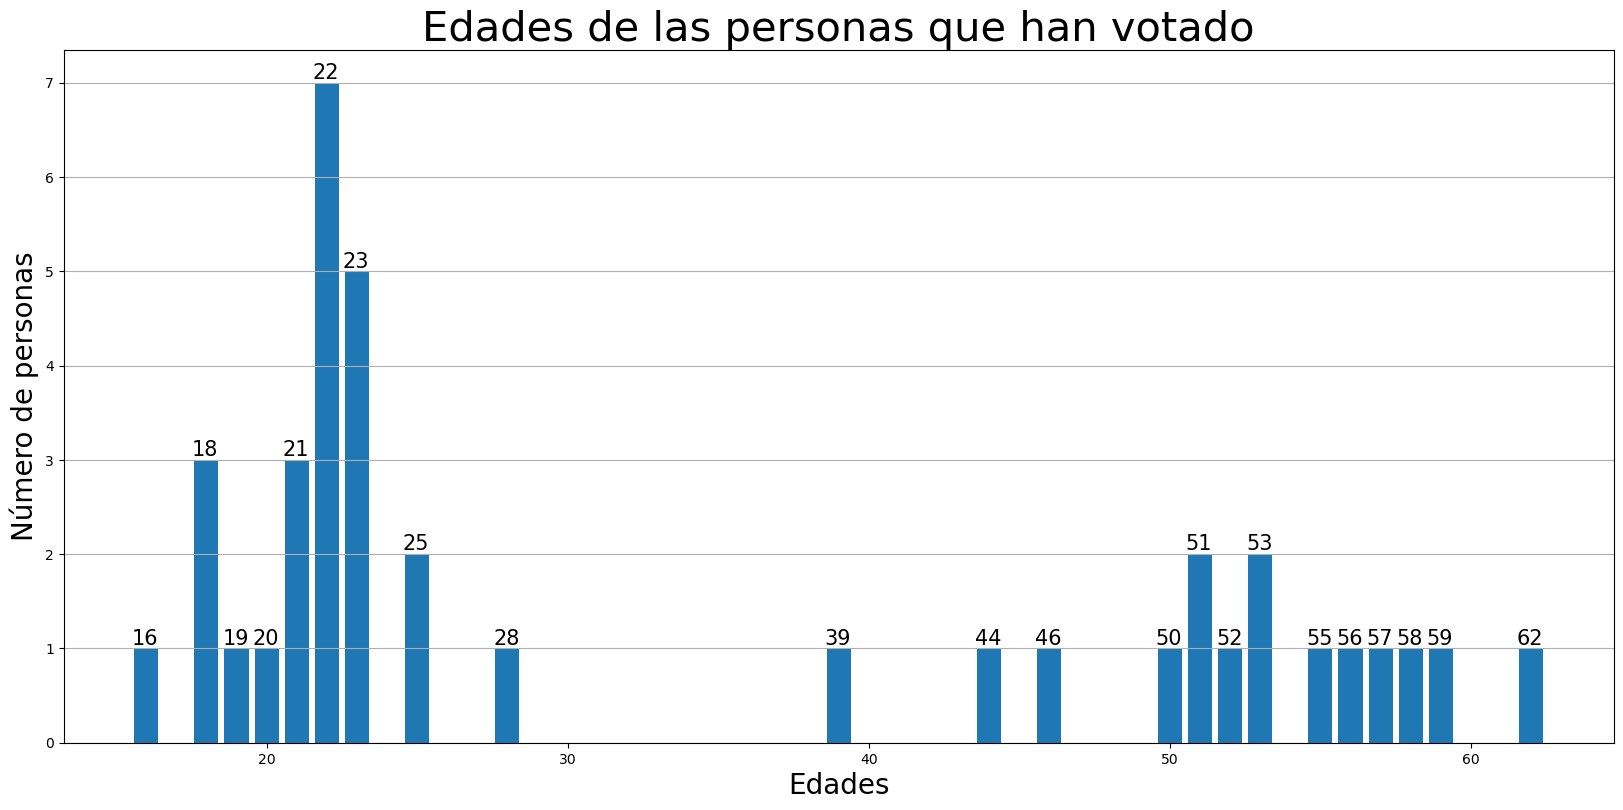

In [18]:
plt.figure(figsize = (20, 9))
graph = plt.bar(edades["Edad"], edades["Count"])
plt.xlabel('Edades', fontsize=20)
plt.ylabel("Número de personas", fontsize=20)
plt.title('Edades de las personas que han votado', fontsize=30)
for i in edades.index:
    plt.annotate('{}'.format(edades["Edad"][i]), 
                 xy=(graph[i].get_x() + graph[i].get_width()//2, graph[i].get_height()), 
                 xytext=(8, 0), 
                 textcoords='offset points', 
                 ha='center', 
                 va='bottom',
                fontsize=15)
plt.grid(axis='y')
plt.show()

## 5.2. Indicadores
Se crea un dataframe que contiene la importancia que se da según cada rango

In [25]:
respuestas = {'importancia': [0, 1, 2, 3, 4]}

df_respuestas = pd.DataFrame.from_dict(respuestas)

df_respuestas["menores"] = 0
df_respuestas["medianos"] = 0
df_respuestas["mayores"] = 0
df_respuestas

,importancia,menores,medianos,mayores
0,0,0,0,0
1,1,0,0,0
2,2,0,0,0
3,3,0,0,0
4,4,0,0,0


Se crea un dataframe cualquiera para seguir su índice en el próximo bucle for

In [26]:
indicador = encuesta[["0 - 17 años", "18 - 64 años", "65+ años"]]
indicador.head()

,0 - 17 años,18 - 64 años,65+ años
0,4.0,4,4.0
1,2.0,3,3.0
2,1.0,0,2.0
3,4.0,3,4.0
4,4.0,4,4.0


Se suman la importancia de cada rango para guardarla en el indicador

In [27]:
for i in indicador.index:
    for rango_edad in indicador:
        if not math.isnan(indicador[rango_edad][i]):
            if rango_edad == "0 - 17 años":
                df_respuestas["menores"][indicador[rango_edad][i]] += 1
                
            if rango_edad == "18 - 64 años":
                df_respuestas["medianos"][indicador[rango_edad][i]] += 1
                
            if rango_edad == "65+ años":
                df_respuestas["mayores"][indicador[rango_edad][i]] += 1
                
df_respuestas

,importancia,menores,medianos,mayores
0,0,1,2,1
1,1,4,1,4
2,2,3,8,4
3,3,11,21,9
4,4,13,8,15


### 5.2.1. 1, 2, 3 y 4. areas de descanso, espacios culturales, centros educativos y farmacias

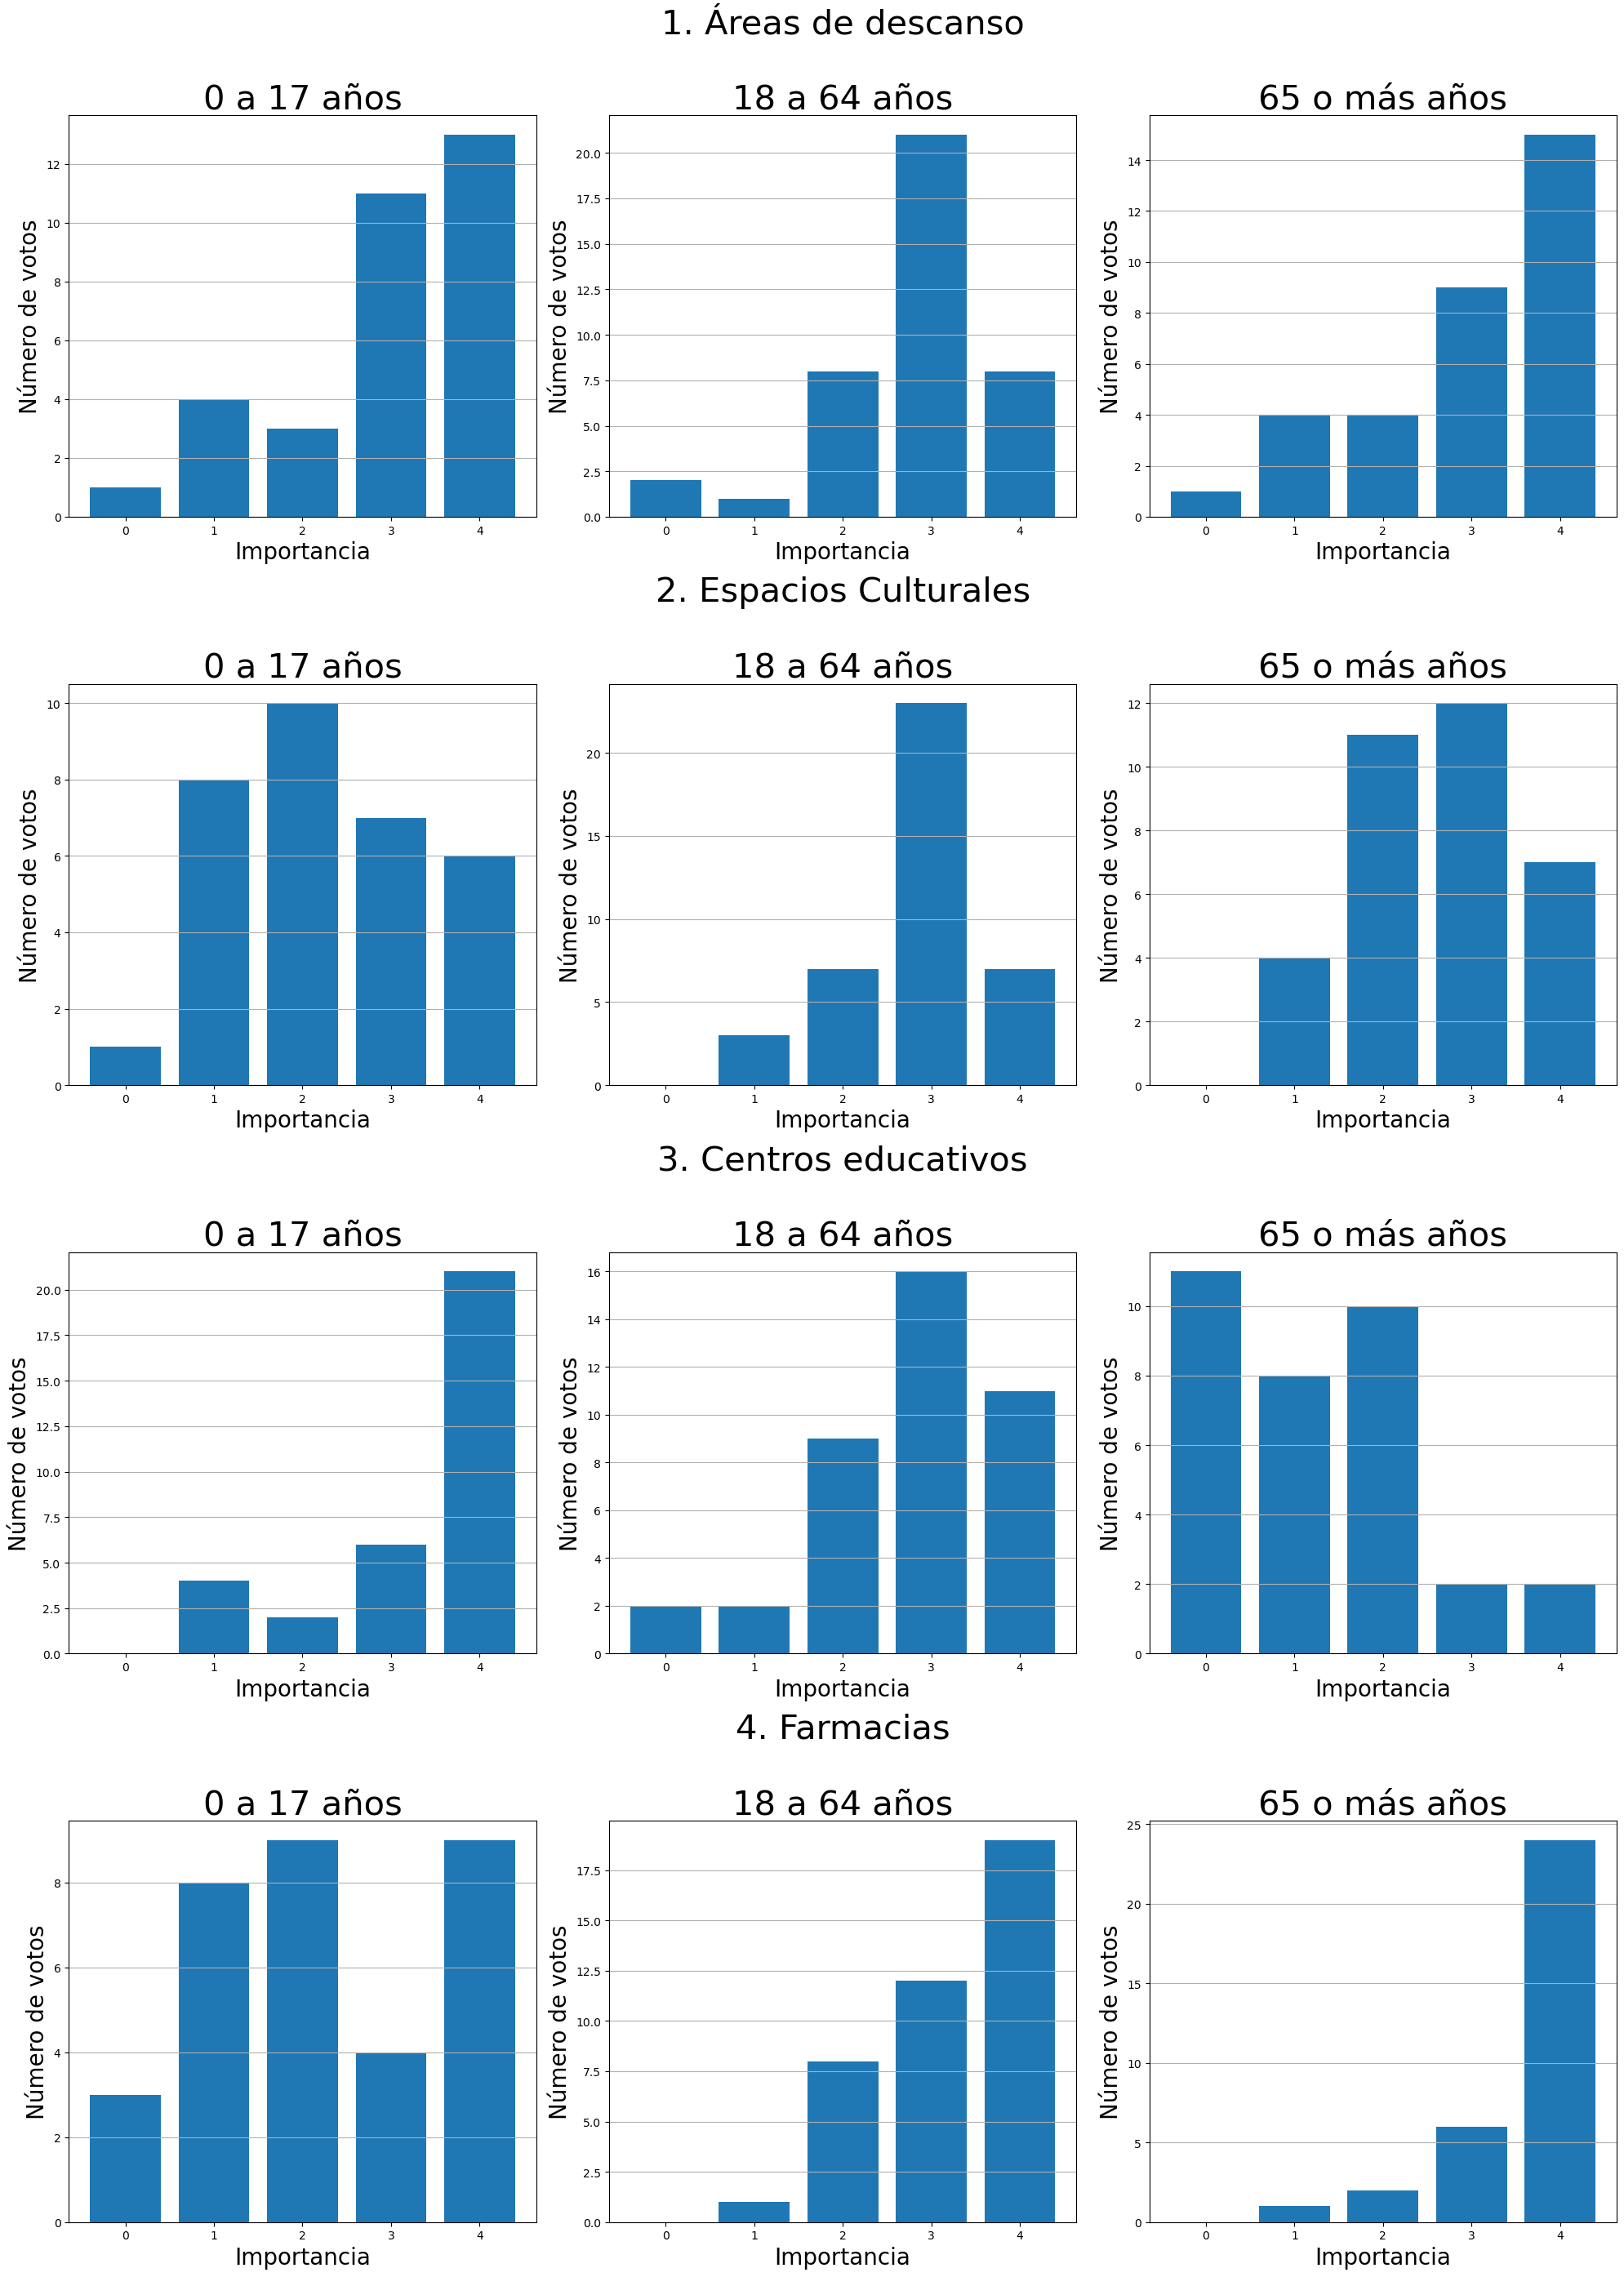

In [56]:
respuestas = {'importancia': [0, 1, 2, 3, 4]}

df_respuestas = pd.DataFrame.from_dict(respuestas)

df_respuestas["menores_1"] = 0
df_respuestas["medianos_1"] = 0
df_respuestas["mayores_1"] = 0
df_respuestas["menores_2"] = 0
df_respuestas["medianos_2"] = 0
df_respuestas["mayores_2"] = 0
df_respuestas["menores_3"] = 0
df_respuestas["medianos_3"] = 0
df_respuestas["mayores_3"] = 0
df_respuestas["menores_4"] = 0
df_respuestas["medianos_4"] = 0
df_respuestas["mayores_4"] = 0

# indicador 1
indicador = encuesta[["0 - 17 años", "18 - 64 años", "65+ años"]]

for i in indicador.index:
    for rango_edad in indicador:
        if not math.isnan(indicador[rango_edad][i]):
            if rango_edad == "0 - 17 años":
                df_respuestas["menores_1"][indicador[rango_edad][i]] += 1
                
            if rango_edad == "18 - 64 años":
                df_respuestas["medianos_1"][indicador[rango_edad][i]] += 1
                
            if rango_edad == "65+ años":
                df_respuestas["mayores_1"][indicador[rango_edad][i]] += 1
                

# indicador 2
indicador = encuesta[["0 - 17 años.1", "18 - 64 años.1", "65+ años.1"]]

for i in indicador.index:
    for rango_edad in indicador:
        if not math.isnan(indicador[rango_edad][i]):
            if rango_edad == "0 - 17 años.1":
                df_respuestas["menores_2"][indicador[rango_edad][i]] += 1
                
            if rango_edad == "18 - 64 años.1":
                df_respuestas["medianos_2"][indicador[rango_edad][i]] += 1
                
            if rango_edad == "65+ años.1":
                df_respuestas["mayores_2"][indicador[rango_edad][i]] += 1
                
# indicador 3
indicador = encuesta[["0 - 17 años.2", "18 - 64 años.2", "65+ años.2"]]

for i in indicador.index:
    for rango_edad in indicador:
        if not math.isnan(indicador[rango_edad][i]):
            if rango_edad == "0 - 17 años.2":
                df_respuestas["menores_3"][indicador[rango_edad][i]] += 1
                
            if rango_edad == "18 - 64 años.2":
                df_respuestas["medianos_3"][indicador[rango_edad][i]] += 1
                
            if rango_edad == "65+ años.2":
                df_respuestas["mayores_3"][indicador[rango_edad][i]] += 1
                
# indicador 4
indicador = encuesta[["0 - 17 años.3", "18 - 64 años.3", "65+ años.3"]]

for i in indicador.index:
    for rango_edad in indicador:
        if not math.isnan(indicador[rango_edad][i]):
            if rango_edad == "0 - 17 años.3":
                df_respuestas["menores_4"][indicador[rango_edad][i]] += 1
                
            if rango_edad == "18 - 64 años.3":
                df_respuestas["medianos_4"][indicador[rango_edad][i]] += 1
                
            if rango_edad == "65+ años.3":
                df_respuestas["mayores_4"][indicador[rango_edad][i]] += 1
                
                
                
fig, axs = plt.subplots(4, 3, figsize = (20, 28))

# indicador 1
axs[0, 0].bar(df_respuestas["importancia"], df_respuestas["menores_1"])
axs[0, 0].set_title('0 a 17 años', fontsize=30)
axs[0, 0].set_xlabel('Importancia', fontsize=20)
axs[0, 0].set_ylabel("Número de votos", fontsize=20)
axs[0, 0].grid(axis='y')

axs[0, 1].bar(df_respuestas["importancia"], df_respuestas["medianos_1"])
axs[0, 1].set_title('1. Áreas de descanso\n\n18 a 64 años', fontsize=30)
axs[0, 1].set_xlabel('Importancia', fontsize=20)
axs[0, 1].set_ylabel("Número de votos", fontsize=20)
axs[0, 1].grid(axis='y')

axs[0, 2].bar(df_respuestas["importancia"], df_respuestas["mayores_1"])
axs[0, 2].set_title('65 o más años', fontsize=30)
axs[0, 2].set_xlabel('Importancia', fontsize=20)
axs[0, 2].set_ylabel("Número de votos", fontsize=20)
axs[0, 2].grid(axis='y')

# indicador 2
axs[1, 0].bar(df_respuestas["importancia"], df_respuestas["menores_2"])
axs[1, 0].set_title('0 a 17 años', fontsize=30)
axs[1, 0].set_xlabel('Importancia', fontsize=20)
axs[1, 0].set_ylabel("Número de votos", fontsize=20)
axs[1, 0].grid(axis='y')

axs[1, 1].bar(df_respuestas["importancia"], df_respuestas["medianos_2"])
axs[1, 1].set_title('2. Espacios Culturales\n\n18 a 64 años', fontsize=30)
axs[1, 1].set_xlabel('Importancia', fontsize=20)
axs[1, 1].set_ylabel("Número de votos", fontsize=20)
axs[1, 1].grid(axis='y')

axs[1, 2].bar(df_respuestas["importancia"], df_respuestas["mayores_2"])
axs[1, 2].set_title('65 o más años', fontsize=30)
axs[1, 2].set_xlabel('Importancia', fontsize=20)
axs[1, 2].set_ylabel("Número de votos", fontsize=20)
axs[1, 2].grid(axis='y')

# indicador 3
axs[2, 0].bar(df_respuestas["importancia"], df_respuestas["menores_3"])
axs[2, 0].set_title('0 a 17 años', fontsize=30)
axs[2, 0].set_xlabel('Importancia', fontsize=20)
axs[2, 0].set_ylabel("Número de votos", fontsize=20)
axs[2, 0].grid(axis='y')

axs[2, 1].bar(df_respuestas["importancia"], df_respuestas["medianos_3"])
axs[2, 1].set_title('3. Centros educativos\n\n18 a 64 años', fontsize=30)
axs[2, 1].set_xlabel('Importancia', fontsize=20)
axs[2, 1].set_ylabel("Número de votos", fontsize=20)
axs[2, 1].grid(axis='y')

axs[2, 2].bar(df_respuestas["importancia"], df_respuestas["mayores_3"])
axs[2, 2].set_title('65 o más años', fontsize=30)
axs[2, 2].set_xlabel('Importancia', fontsize=20)
axs[2, 2].set_ylabel("Número de votos", fontsize=20)
axs[2, 2].grid(axis='y')

# indicador 4
axs[3, 0].bar(df_respuestas["importancia"], df_respuestas["menores_4"])
axs[3, 0].set_title('0 a 17 años', fontsize=30)
axs[3, 0].set_xlabel('Importancia', fontsize=20)
axs[3, 0].set_ylabel("Número de votos", fontsize=20)
axs[3, 0].grid(axis='y')

axs[3, 1].bar(df_respuestas["importancia"], df_respuestas["medianos_4"])
axs[3, 1].set_title('4. Farmacias\n\n18 a 64 años', fontsize=30)
axs[3, 1].set_xlabel('Importancia', fontsize=20)
axs[3, 1].set_ylabel("Número de votos", fontsize=20)
axs[3, 1].grid(axis='y')

axs[3, 2].bar(df_respuestas["importancia"], df_respuestas["mayores_4"])
axs[3, 2].set_title('65 o más años', fontsize=30)
axs[3, 2].set_xlabel('Importancia', fontsize=20)
axs[3, 2].set_ylabel("Número de votos", fontsize=20)
axs[3, 2].grid(axis='y')

fig.tight_layout()

plt.show()

### 5.2.2. 5, 6, 7 y 8. Centros de salud, residencias, centros deportivos y servicios públicos

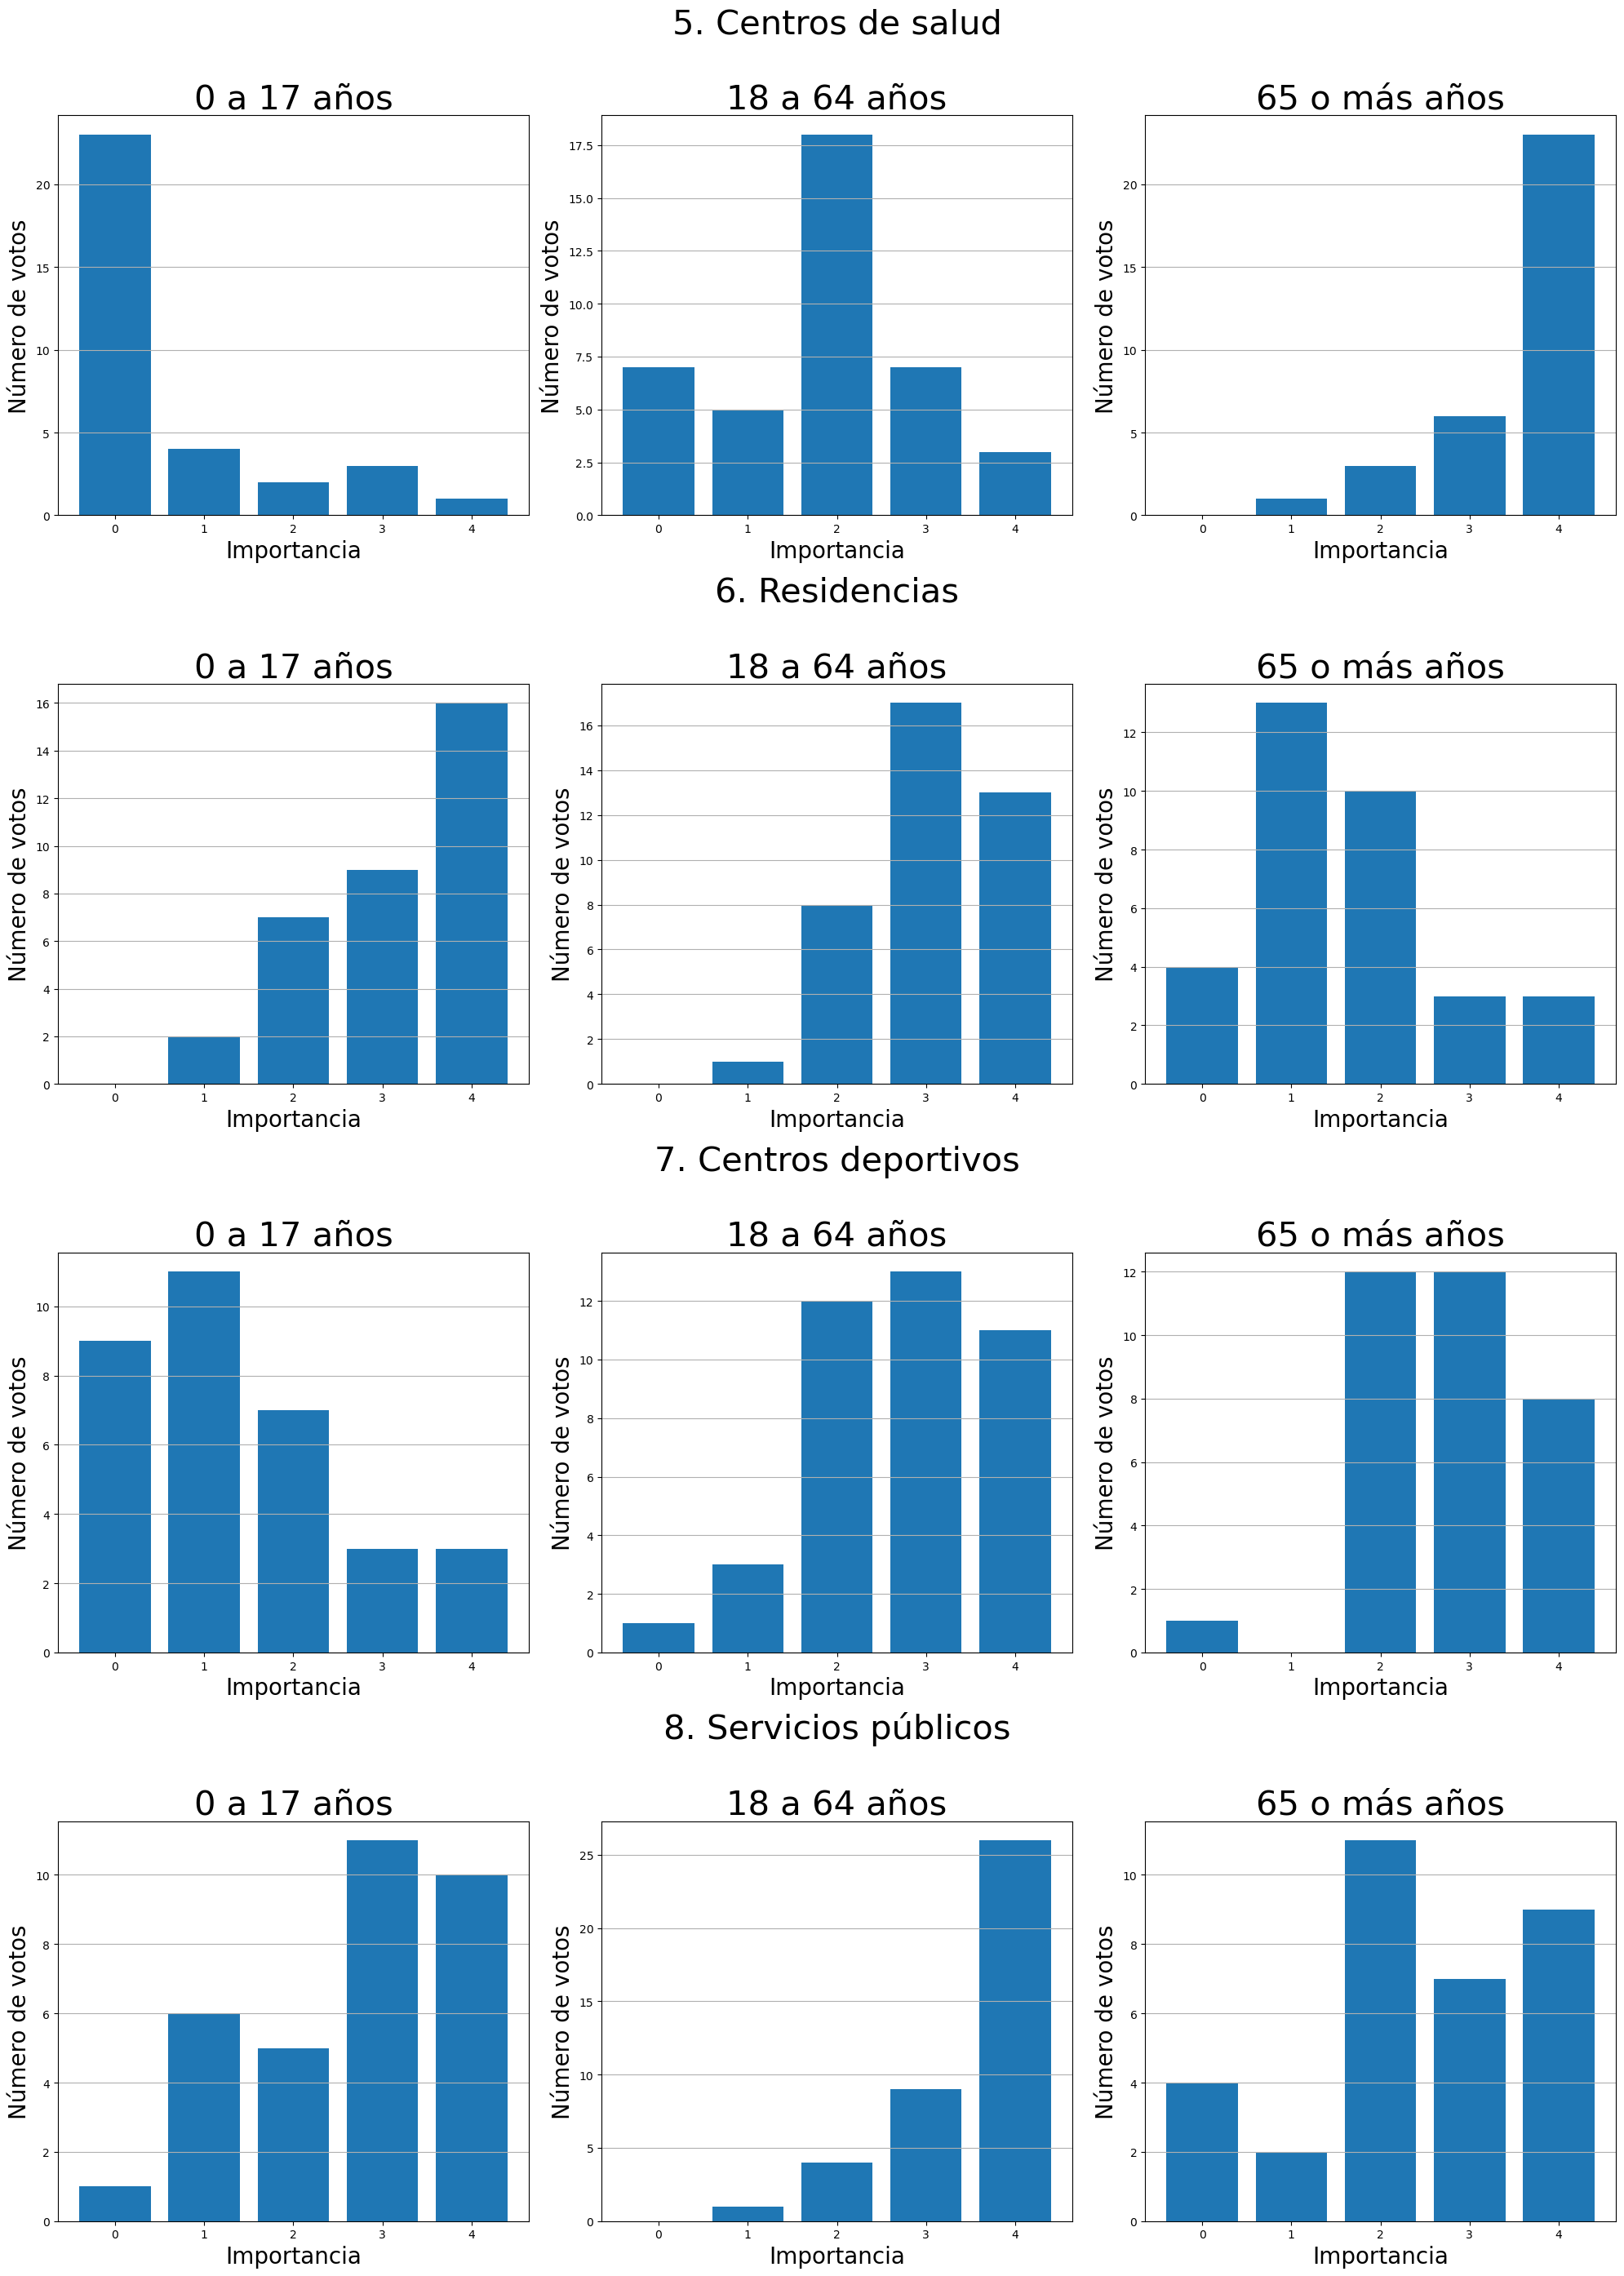

In [58]:
respuestas = {'importancia': [0, 1, 2, 3, 4]}

df_respuestas = pd.DataFrame.from_dict(respuestas)

df_respuestas["menores_1"] = 0
df_respuestas["medianos_1"] = 0
df_respuestas["mayores_1"] = 0
df_respuestas["menores_2"] = 0
df_respuestas["medianos_2"] = 0
df_respuestas["mayores_2"] = 0
df_respuestas["menores_3"] = 0
df_respuestas["medianos_3"] = 0
df_respuestas["mayores_3"] = 0
df_respuestas["menores_4"] = 0
df_respuestas["medianos_4"] = 0
df_respuestas["mayores_4"] = 0

# indicador 1
indicador = encuesta[["0 - 17 años.5", "18 - 64 años.5", "65+ años.5"]]

for i in indicador.index:
    for rango_edad in indicador:
        if not math.isnan(indicador[rango_edad][i]):
            if rango_edad == "0 - 17 años.5":
                df_respuestas["menores_1"][indicador[rango_edad][i]] += 1
                
            if rango_edad == "18 - 64 años.5":
                df_respuestas["medianos_1"][indicador[rango_edad][i]] += 1
                
            if rango_edad == "65+ años.5":
                df_respuestas["mayores_1"][indicador[rango_edad][i]] += 1
                

# indicador 2
indicador = encuesta[["0 - 17 años.6", "18 - 64 años.6", "65+ años.6"]]

for i in indicador.index:
    for rango_edad in indicador:
        if not math.isnan(indicador[rango_edad][i]):
            if rango_edad == "0 - 17 años.6":
                df_respuestas["menores_2"][indicador[rango_edad][i]] += 1
                
            if rango_edad == "18 - 64 años.6":
                df_respuestas["medianos_2"][indicador[rango_edad][i]] += 1
                
            if rango_edad == "65+ años.6":
                df_respuestas["mayores_2"][indicador[rango_edad][i]] += 1
                
# indicador 3
indicador = encuesta[["0 - 17 años.7", "18 - 64 años.7", "65+ años.7"]]

for i in indicador.index:
    for rango_edad in indicador:
        if not math.isnan(indicador[rango_edad][i]):
            if rango_edad == "0 - 17 años.7":
                df_respuestas["menores_3"][indicador[rango_edad][i]] += 1
                
            if rango_edad == "18 - 64 años.7":
                df_respuestas["medianos_3"][indicador[rango_edad][i]] += 1
                
            if rango_edad == "65+ años.7":
                df_respuestas["mayores_3"][indicador[rango_edad][i]] += 1
                
# indicador 4
indicador = encuesta[["0 - 17 años.8", "18 - 64 años.8", "65+ años.8"]]

for i in indicador.index:
    for rango_edad in indicador:
        if not math.isnan(indicador[rango_edad][i]):
            if rango_edad == "0 - 17 años.8":
                df_respuestas["menores_4"][indicador[rango_edad][i]] += 1
                
            if rango_edad == "18 - 64 años.8":
                df_respuestas["medianos_4"][indicador[rango_edad][i]] += 1
                
            if rango_edad == "65+ años.8":
                df_respuestas["mayores_4"][indicador[rango_edad][i]] += 1
                
                
                
fig, axs = plt.subplots(4, 3, figsize = (20, 28))

# indicador 1
axs[0, 0].bar(df_respuestas["importancia"], df_respuestas["menores_1"])
axs[0, 0].set_title('0 a 17 años', fontsize=30)
axs[0, 0].set_xlabel('Importancia', fontsize=20)
axs[0, 0].set_ylabel("Número de votos", fontsize=20)
axs[0, 0].grid(axis='y')

axs[0, 1].bar(df_respuestas["importancia"], df_respuestas["medianos_1"])
axs[0, 1].set_title('5. Centros de salud\n\n18 a 64 años', fontsize=30)
axs[0, 1].set_xlabel('Importancia', fontsize=20)
axs[0, 1].set_ylabel("Número de votos", fontsize=20)
axs[0, 1].grid(axis='y')

axs[0, 2].bar(df_respuestas["importancia"], df_respuestas["mayores_1"])
axs[0, 2].set_title('65 o más años', fontsize=30)
axs[0, 2].set_xlabel('Importancia', fontsize=20)
axs[0, 2].set_ylabel("Número de votos", fontsize=20)
axs[0, 2].grid(axis='y')

# indicador 2
axs[1, 0].bar(df_respuestas["importancia"], df_respuestas["menores_2"])
axs[1, 0].set_title('0 a 17 años', fontsize=30)
axs[1, 0].set_xlabel('Importancia', fontsize=20)
axs[1, 0].set_ylabel("Número de votos", fontsize=20)
axs[1, 0].grid(axis='y')

axs[1, 1].bar(df_respuestas["importancia"], df_respuestas["medianos_2"])
axs[1, 1].set_title('6. Residencias\n\n18 a 64 años', fontsize=30)
axs[1, 1].set_xlabel('Importancia', fontsize=20)
axs[1, 1].set_ylabel("Número de votos", fontsize=20)
axs[1, 1].grid(axis='y')

axs[1, 2].bar(df_respuestas["importancia"], df_respuestas["mayores_2"])
axs[1, 2].set_title('65 o más años', fontsize=30)
axs[1, 2].set_xlabel('Importancia', fontsize=20)
axs[1, 2].set_ylabel("Número de votos", fontsize=20)
axs[1, 2].grid(axis='y')

# indicador 3
axs[2, 0].bar(df_respuestas["importancia"], df_respuestas["menores_3"])
axs[2, 0].set_title('0 a 17 años', fontsize=30)
axs[2, 0].set_xlabel('Importancia', fontsize=20)
axs[2, 0].set_ylabel("Número de votos", fontsize=20)
axs[2, 0].grid(axis='y')

axs[2, 1].bar(df_respuestas["importancia"], df_respuestas["medianos_3"])
axs[2, 1].set_title('7. Centros deportivos\n\n18 a 64 años', fontsize=30)
axs[2, 1].set_xlabel('Importancia', fontsize=20)
axs[2, 1].set_ylabel("Número de votos", fontsize=20)
axs[2, 1].grid(axis='y')

axs[2, 2].bar(df_respuestas["importancia"], df_respuestas["mayores_3"])
axs[2, 2].set_title('65 o más años', fontsize=30)
axs[2, 2].set_xlabel('Importancia', fontsize=20)
axs[2, 2].set_ylabel("Número de votos", fontsize=20)
axs[2, 2].grid(axis='y')

# indicador 4
axs[3, 0].bar(df_respuestas["importancia"], df_respuestas["menores_4"])
axs[3, 0].set_title('0 a 17 años', fontsize=30)
axs[3, 0].set_xlabel('Importancia', fontsize=20)
axs[3, 0].set_ylabel("Número de votos", fontsize=20)
axs[3, 0].grid(axis='y')

axs[3, 1].bar(df_respuestas["importancia"], df_respuestas["medianos_4"])
axs[3, 1].set_title('8. Servicios públicos\n\n18 a 64 años', fontsize=30)
axs[3, 1].set_xlabel('Importancia', fontsize=20)
axs[3, 1].set_ylabel("Número de votos", fontsize=20)
axs[3, 1].grid(axis='y')

axs[3, 2].bar(df_respuestas["importancia"], df_respuestas["mayores_4"])
axs[3, 2].set_title('65 o más años', fontsize=30)
axs[3, 2].set_xlabel('Importancia', fontsize=20)
axs[3, 2].set_ylabel("Número de votos", fontsize=20)
axs[3, 2].grid(axis='y')

fig.tight_layout()

plt.show()

### 5.2.3. 9, 10, 11 y 12. Lugares de ocio, estaciones de transporte público, comercios básicos y secundarios

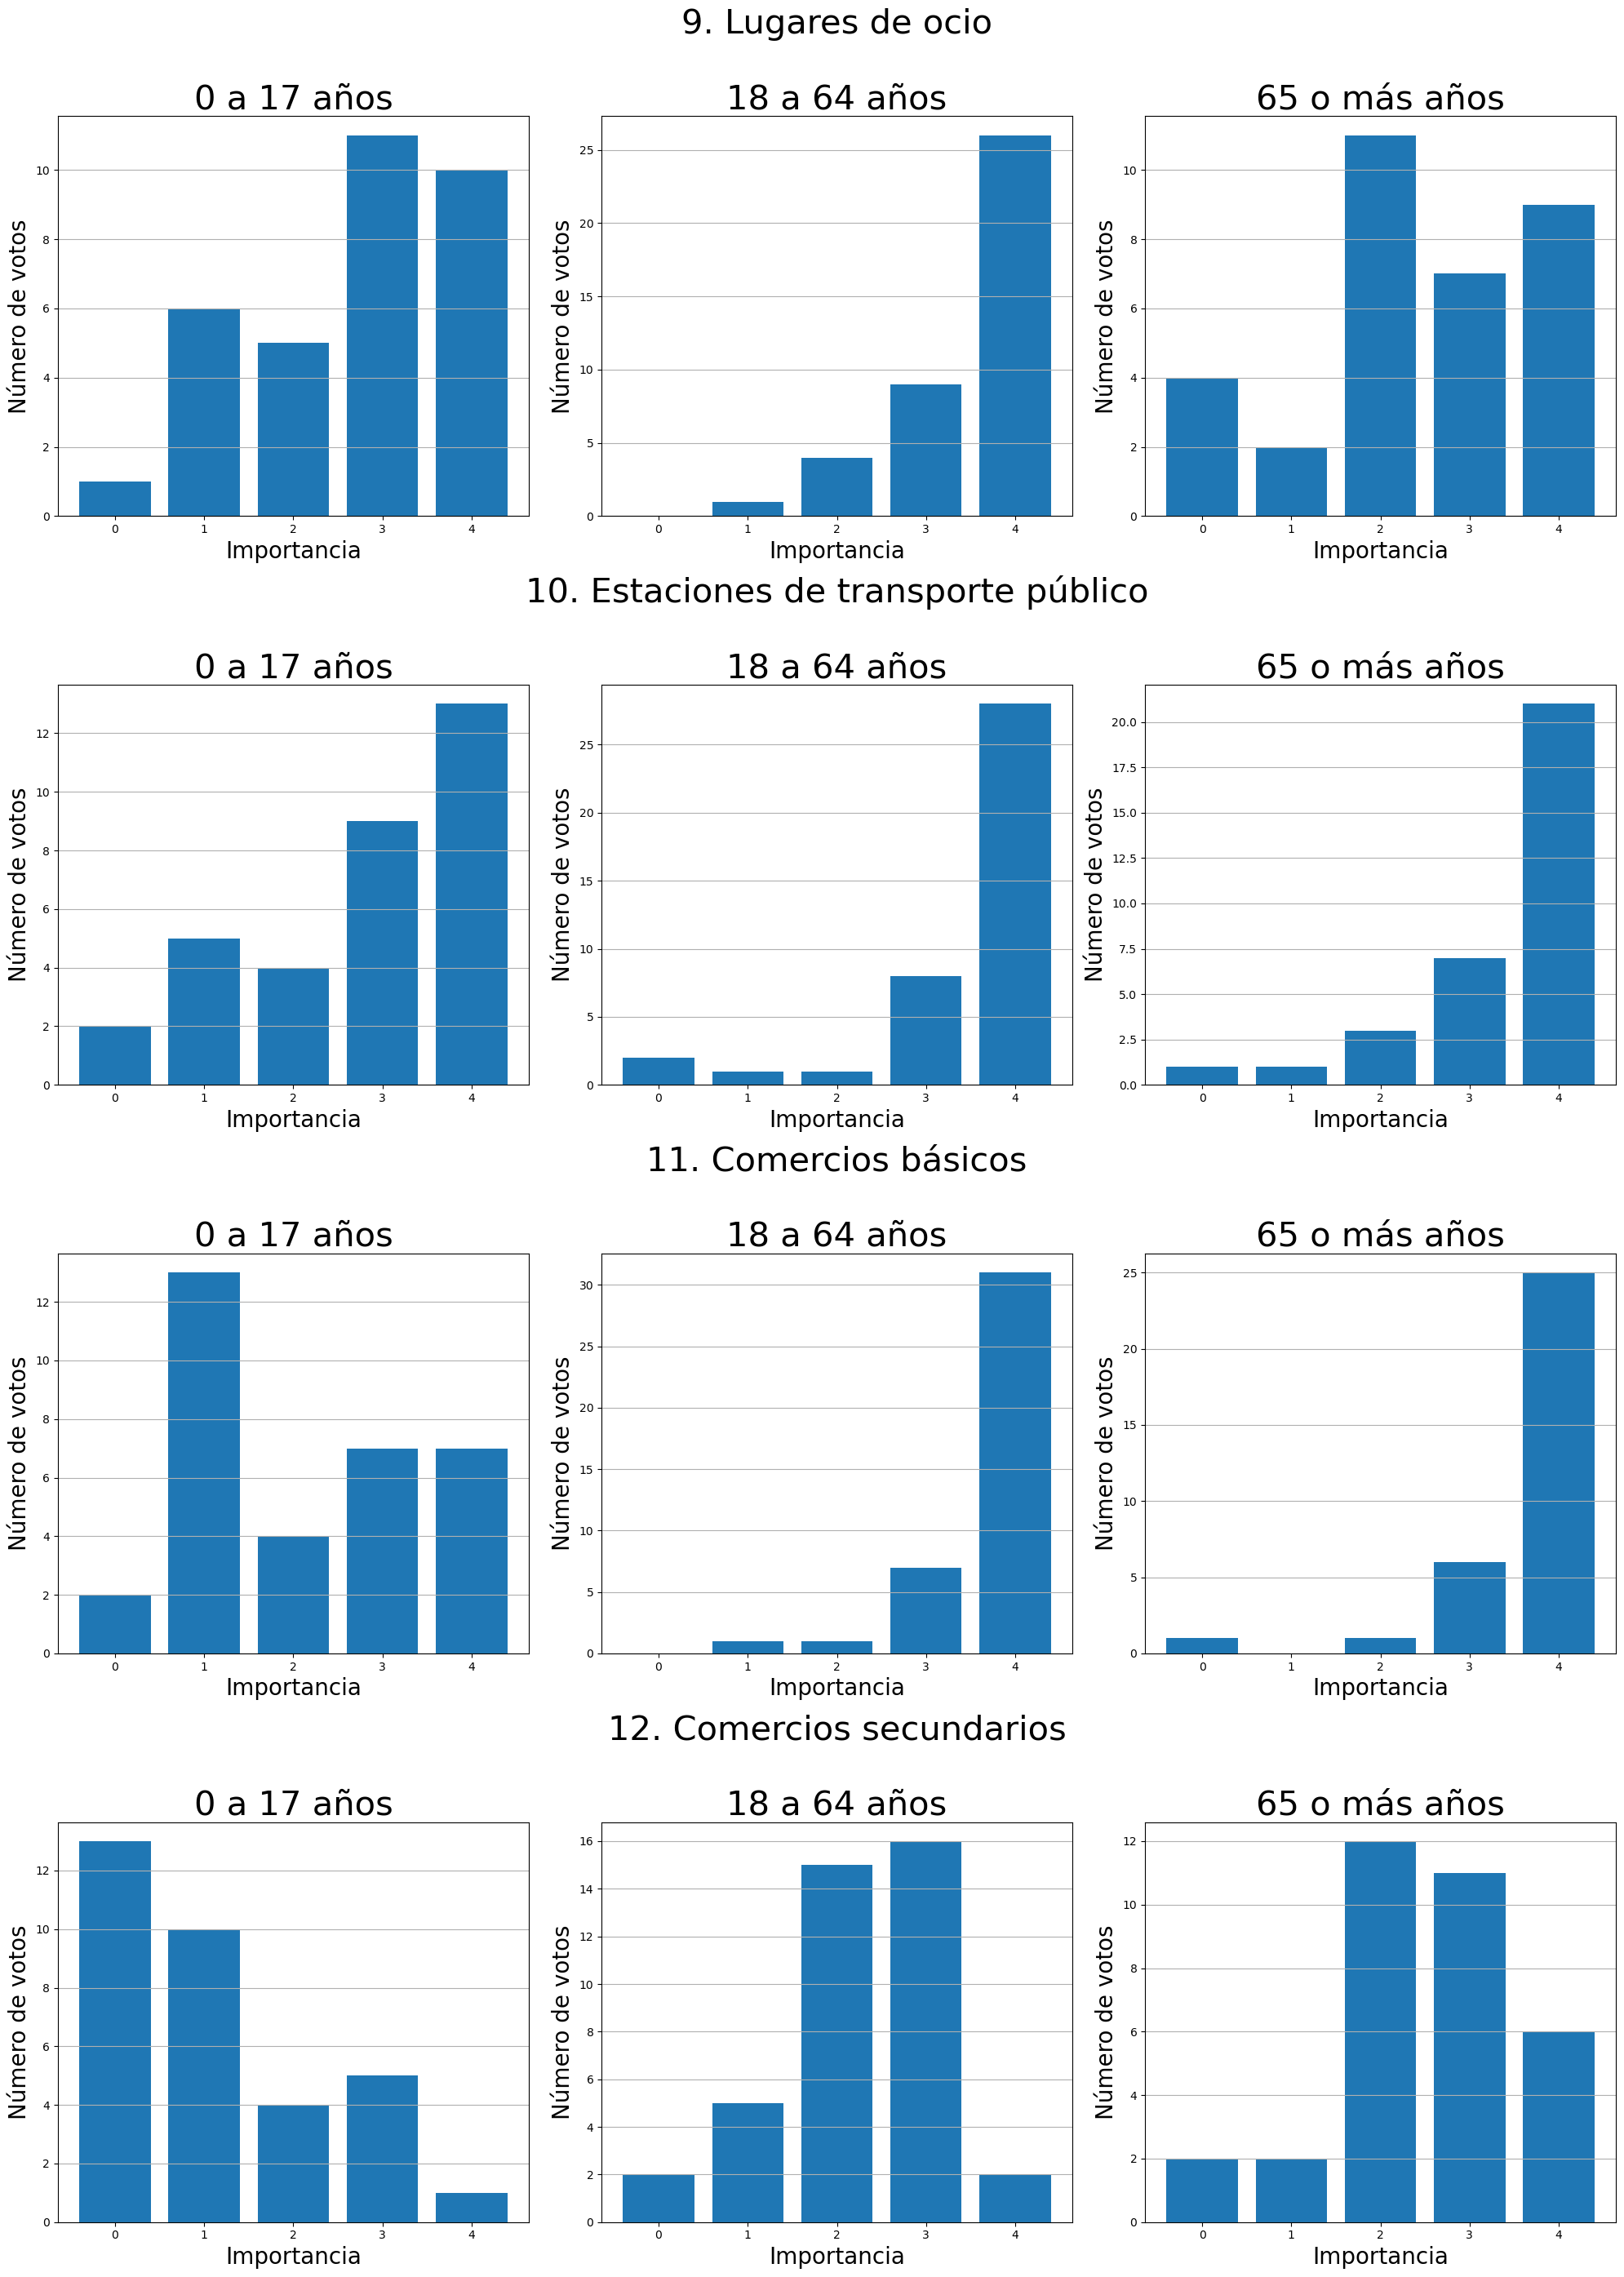

In [57]:
respuestas = {'importancia': [0, 1, 2, 3, 4]}

df_respuestas = pd.DataFrame.from_dict(respuestas)

df_respuestas["menores_1"] = 0
df_respuestas["medianos_1"] = 0
df_respuestas["mayores_1"] = 0
df_respuestas["menores_2"] = 0
df_respuestas["medianos_2"] = 0
df_respuestas["mayores_2"] = 0
df_respuestas["menores_3"] = 0
df_respuestas["medianos_3"] = 0
df_respuestas["mayores_3"] = 0
df_respuestas["menores_4"] = 0
df_respuestas["medianos_4"] = 0
df_respuestas["mayores_4"] = 0


# indicador 1
indicador = encuesta[["0 - 17 años.8", "18 - 64 años.8", "65+ años.8"]]

for i in indicador.index:
    for rango_edad in indicador:
        if not math.isnan(indicador[rango_edad][i]):
            if rango_edad == "0 - 17 años.8":
                df_respuestas["menores_1"][indicador[rango_edad][i]] += 1
                
            if rango_edad == "18 - 64 años.8":
                df_respuestas["medianos_1"][indicador[rango_edad][i]] += 1
                
            if rango_edad == "65+ años.8":
                df_respuestas["mayores_1"][indicador[rango_edad][i]] += 1

# indicador 2
indicador = encuesta[["0 - 17 años.9", "18 - 64 años.9", "65+ años.9"]]

for i in indicador.index:
    for rango_edad in indicador:
        if not math.isnan(indicador[rango_edad][i]):
            if rango_edad == "0 - 17 años.9":
                df_respuestas["menores_2"][indicador[rango_edad][i]] += 1
                
            if rango_edad == "18 - 64 años.9":
                df_respuestas["medianos_2"][indicador[rango_edad][i]] += 1
                
            if rango_edad == "65+ años.9":
                df_respuestas["mayores_2"][indicador[rango_edad][i]] += 1
                

# indicador 3
indicador = encuesta[["0 - 17 años.10", "18 - 64 años.10", "65+ años.10"]]

for i in indicador.index:
    for rango_edad in indicador:
        if not math.isnan(indicador[rango_edad][i]):
            if rango_edad == "0 - 17 años.10":
                df_respuestas["menores_3"][indicador[rango_edad][i]] += 1
                
            if rango_edad == "18 - 64 años.10":
                df_respuestas["medianos_3"][indicador[rango_edad][i]] += 1
                
            if rango_edad == "65+ años.10":
                df_respuestas["mayores_3"][indicador[rango_edad][i]] += 1
                
# indicador 4
indicador = encuesta[["0 - 17 años.11", "18 - 64 años.11", "65+ años.11"]]

for i in indicador.index:
    for rango_edad in indicador:
        if not math.isnan(indicador[rango_edad][i]):
            if rango_edad == "0 - 17 años.11":
                df_respuestas["menores_4"][indicador[rango_edad][i]] += 1
                
            if rango_edad == "18 - 64 años.11":
                df_respuestas["medianos_4"][indicador[rango_edad][i]] += 1
                
            if rango_edad == "65+ años.11":
                df_respuestas["mayores_4"][indicador[rango_edad][i]] += 1               
                
                
                
fig, axs = plt.subplots(4, 3, figsize = (20, 28))

# indicador 1
axs[0, 0].bar(df_respuestas["importancia"], df_respuestas["menores_1"])
axs[0, 0].set_title('0 a 17 años', fontsize=30)
axs[0, 0].set_xlabel('Importancia', fontsize=20)
axs[0, 0].set_ylabel("Número de votos", fontsize=20)
axs[0, 0].grid(axis='y')

axs[0, 1].bar(df_respuestas["importancia"], df_respuestas["medianos_1"])
axs[0, 1].set_title('9. Lugares de ocio\n\n18 a 64 años', fontsize=30)
axs[0, 1].set_xlabel('Importancia', fontsize=20)
axs[0, 1].set_ylabel("Número de votos", fontsize=20)
axs[0, 1].grid(axis='y')

axs[0, 2].bar(df_respuestas["importancia"], df_respuestas["mayores_1"])
axs[0, 2].set_title('65 o más años', fontsize=30)
axs[0, 2].set_xlabel('Importancia', fontsize=20)
axs[0, 2].set_ylabel("Número de votos", fontsize=20)
axs[0, 2].grid(axis='y')

# indicador 2
axs[1, 0].bar(df_respuestas["importancia"], df_respuestas["menores_2"])
axs[1, 0].set_title('0 a 17 años', fontsize=30)
axs[1, 0].set_xlabel('Importancia', fontsize=20)
axs[1, 0].set_ylabel("Número de votos", fontsize=20)
axs[1, 0].grid(axis='y')

axs[1, 1].bar(df_respuestas["importancia"], df_respuestas["medianos_2"])
axs[1, 1].set_title('10. Estaciones de transporte público\n\n18 a 64 años', fontsize=30)
axs[1, 1].set_xlabel('Importancia', fontsize=20)
axs[1, 1].set_ylabel("Número de votos", fontsize=20)
axs[1, 1].grid(axis='y')

axs[1, 2].bar(df_respuestas["importancia"], df_respuestas["mayores_2"])
axs[1, 2].set_title('65 o más años', fontsize=30)
axs[1, 2].set_xlabel('Importancia', fontsize=20)
axs[1, 2].set_ylabel("Número de votos", fontsize=20)
axs[1, 2].grid(axis='y')

# indicador 3
axs[2, 0].bar(df_respuestas["importancia"], df_respuestas["menores_3"])
axs[2, 0].set_title('0 a 17 años', fontsize=30)
axs[2, 0].set_xlabel('Importancia', fontsize=20)
axs[2, 0].set_ylabel("Número de votos", fontsize=20)
axs[2, 0].grid(axis='y')

axs[2, 1].bar(df_respuestas["importancia"], df_respuestas["medianos_3"])
axs[2, 1].set_title('11. Comercios básicos\n\n18 a 64 años', fontsize=30)
axs[2, 1].set_xlabel('Importancia', fontsize=20)
axs[2, 1].set_ylabel("Número de votos", fontsize=20)
axs[2, 1].grid(axis='y')

axs[2, 2].bar(df_respuestas["importancia"], df_respuestas["mayores_3"])
axs[2, 2].set_title('65 o más años', fontsize=30)
axs[2, 2].set_xlabel('Importancia', fontsize=20)
axs[2, 2].set_ylabel("Número de votos", fontsize=20)
axs[2, 2].grid(axis='y')

# indicador 4
axs[3, 0].bar(df_respuestas["importancia"], df_respuestas["menores_4"])
axs[3, 0].set_title('0 a 17 años', fontsize=30)
axs[3, 0].set_xlabel('Importancia', fontsize=20)
axs[3, 0].set_ylabel("Número de votos", fontsize=20)
axs[3, 0].grid(axis='y')

axs[3, 1].bar(df_respuestas["importancia"], df_respuestas["medianos_4"])
axs[3, 1].set_title('12. Comercios secundarios\n\n18 a 64 años', fontsize=30)
axs[3, 1].set_xlabel('Importancia', fontsize=20)
axs[3, 1].set_ylabel("Número de votos", fontsize=20)
axs[3, 1].grid(axis='y')

axs[3, 2].bar(df_respuestas["importancia"], df_respuestas["mayores_4"])
axs[3, 2].set_title('65 o más años', fontsize=30)
axs[3, 2].set_xlabel('Importancia', fontsize=20)
axs[3, 2].set_ylabel("Número de votos", fontsize=20)
axs[3, 2].grid(axis='y')

fig.tight_layout()

plt.show()